# Machine Learning: Linear Regression

## Black Friday Sales Prediction:

We are going to use a dataset of product purchases during a Black Friday (in the US). The main idea is to be able to generate a predictor that allows us to predict the `purchase amount`.

In order to achieve a good predictor we must apply the different concepts that we have been learning:

* `Exploration`
* `Feature Engineering`
* `Modeling`
* `Evaluation`

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer `purchase` behaviour against different products. The problem is a `regression problem` where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

### You can try differents Scikit-Learn models from [Linear Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/BlackFriday.csv")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


---
## Explore dataset

In [2]:
# Let's see the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [3]:
# Let's see the % of missing values for each column
data.isna().sum() / len(data) * 100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
dtype: float64

In [4]:
data.User_ID.nunique()

5891

In [5]:
data.Product_ID.nunique()

3623

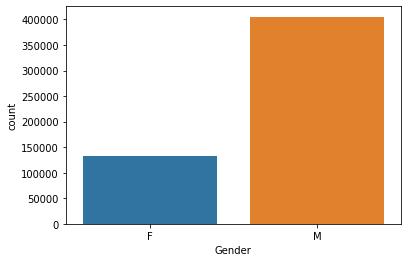

In [6]:
sns.countplot(data=data, x="Gender")

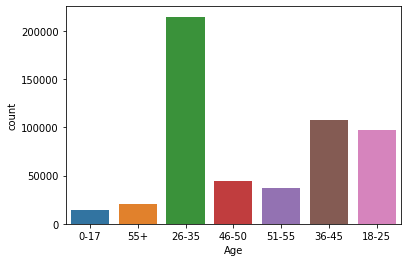

In [7]:
sns.countplot(data=data, x="Age")

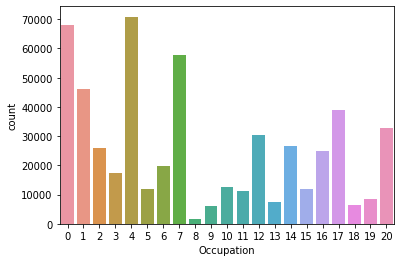

In [8]:
sns.countplot(data=data, x="Occupation")

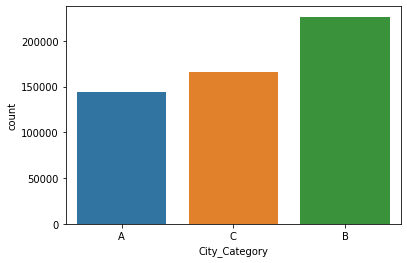

In [9]:
sns.countplot(data=data, x="City_Category")

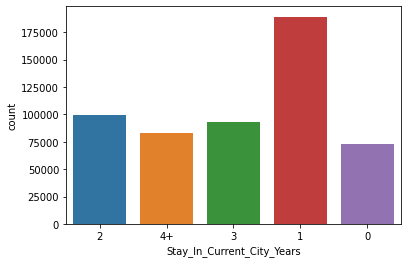

In [10]:
sns.countplot(data=data, x="Stay_In_Current_City_Years")

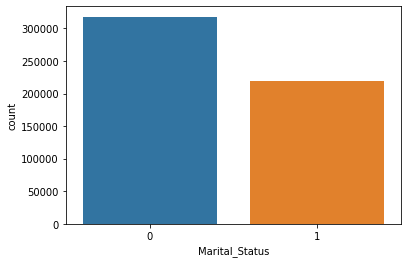

In [11]:
sns.countplot(data=data, x="Marital_Status")

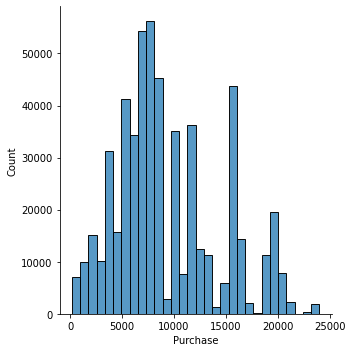

In [12]:
sns.displot(data=data, x="Purchase", kind="hist", bins=30)

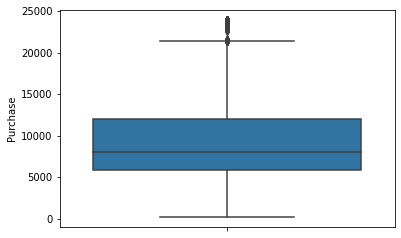

In [13]:
sns.boxplot(data=data, y="Purchase")

---
## Feature Engineering

In [14]:
# Drop columns
data = data.drop(['User_ID', 'Product_ID', 'Product_Category_3'], axis=1)

data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...
537572,M,36-45,16,C,1,0,1,2.0,11664
537573,M,36-45,16,C,1,0,1,15.0,19196
537574,M,36-45,16,C,1,0,8,15.0,8043
537575,M,36-45,16,C,1,0,5,NaN,7172


In [15]:
# Split between train/val/test splits before working on features
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

# 80/30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train shape = {X_train.shape}, X_test shape = {X_test.shape}")

# 80/30 train/val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
print(f"X_train shape = {X_train.shape}, X_val shape = {X_val.shape}")


X_train shape = (376303, 8), X_test shape = (161274, 8)
X_train shape = (263412, 8), X_val shape = (112891, 8)


In [16]:
# Impute NaNs in Product_Category_2 column
# See https://scikit-learn.org/stable/modules/impute.html#imputation-of-missing-values
from sklearn.impute import SimpleImputer

simp_imp = SimpleImputer(strategy="mean")

simp_imp.fit(X_train.Product_Category_2.values.reshape(-1, 1))


SimpleImputer()

In [17]:
X_train.Product_Category_2 = simp_imp.transform(X_train.Product_Category_2.values.reshape(-1, 1))
X_val.Product_Category_2 = simp_imp.transform(X_val.Product_Category_2.values.reshape(-1, 1))


In [18]:
X_train.isna().sum() / len(X_train) * 100

Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
dtype: float64

In [19]:
X_val.isna().sum() / len(X_val) * 100

Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
dtype: float64

In [20]:
# Convert categorical features to One-hot encoded vectors
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(X_train)


OneHotEncoder(handle_unknown='ignore', sparse=False)

In [21]:
enc_X_train = encoder.transform(X_train)
enc_X_val = encoder.transform(X_val)

enc_X_train.shape, enc_X_val.shape

((263412, 76), (112891, 76))

In [22]:
X_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
198277,M,18-25,4,B,4+,1,1,8.000000
63437,F,26-35,9,C,4+,0,5,9.838043
256916,M,26-35,7,A,1,0,5,15.000000
442657,M,26-35,4,A,3,0,3,4.000000
378753,M,36-45,16,A,0,0,8,9.838043
...,...,...,...,...,...,...,...,...
129176,M,51-55,7,A,2,0,5,9.838043
335206,M,51-55,1,C,1,0,3,4.000000
339513,F,51-55,0,C,4+,1,1,16.000000
11394,M,36-45,0,C,4+,0,11,15.000000


In [23]:
encoder.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_F', 'x0_M', 'x1_0-17', 'x1_18-25', 'x1_26-35', 'x1_36-45',
       'x1_46-50', 'x1_51-55', 'x1_55+', 'x2_0', 'x2_1', 'x2_2', 'x2_3',
       'x2_4', 'x2_5', 'x2_6', 'x2_7', 'x2_8', 'x2_9', 'x2_10', 'x2_11',
       'x2_12', 'x2_13', 'x2_14', 'x2_15', 'x2_16', 'x2_17', 'x2_18',
       'x2_19', 'x2_20', 'x3_A', 'x3_B', 'x3_C', 'x4_0', 'x4_1', 'x4_2',
       'x4_3', 'x4_4+', 'x5_0', 'x5_1', 'x6_1', 'x6_2', 'x6_3', 'x6_4',
       'x6_5', 'x6_6', 'x6_7', 'x6_8', 'x6_9', 'x6_10', 'x6_11', 'x6_12',
       'x6_13', 'x6_14', 'x6_15', 'x6_16', 'x6_17', 'x6_18', 'x7_2.0',
       'x7_3.0', 'x7_4.0', 'x7_5.0', 'x7_6.0', 'x7_7.0', 'x7_8.0',
       'x7_9.0', 'x7_9.83804349622838', 'x7_10.0', 'x7_11.0', 'x7_12.0',
       'x7_13.0', 'x7_14.0', 'x7_15.0', 'x7_16.0', 'x7_17.0', 'x7_18.0'],
      dtype=object)

In [24]:
enc_X_train[0]

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
# Scale using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(enc_X_train)

scaled_X_train = scaler.transform(enc_X_train)
scaled_X_val = scaler.transform(enc_X_val)


In [26]:
scaled_X_train[0]

array([-0.5705291 ,  0.5705291 , -0.16751598,  2.12607174, -0.81525856,
       -0.50116592, -0.29989764, -0.2740328 , -0.20189936, -0.38035164,
       -0.30629618, -0.22433184, -0.18263899,  2.57394338, -0.1519289 ,
       -0.19717833, -0.34664578, -0.05271646, -0.10801774, -0.15465294,
       -0.14685612, -0.2449654 , -0.11890002, -0.22839078, -0.15010115,
       -0.22024106, -0.28076296, -0.11155948, -0.12620857, -0.25490209,
       -0.60646392,  1.17198614, -0.6699546 , -0.39460896, -0.73640209,
       -0.47684524, -0.45879035,  2.33927304, -1.20161881,  1.20161881,
        1.69944543, -0.21278491, -0.19553088, -0.14791822, -0.61849572,
       -0.19795625, -0.08264616, -0.51361788, -0.02665368, -0.09707293,
       -0.21693294, -0.08546321, -0.10170855, -0.05282498, -0.10853811,
       -0.1341849 , -0.03267888, -0.07552533, -0.3152132 , -0.07349031,
       -0.22210124, -0.22382731, -0.17617993, -0.03365396,  2.7391461 ,
       -0.10295855, -0.67187033, -0.07445019, -0.16326415, -0.10

---
## Train the model

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(scaled_X_train, y_train)

print(mean_absolute_error(y_true=y_train, y_pred=lr.predict(scaled_X_train)))

print(mean_absolute_error(y_true=y_val, y_pred=lr.predict(scaled_X_val)))


2283.598297703206
2281.9950432358974


In [28]:
from sklearn.linear_model import SGDRegressor

sgd_lr = SGDRegressor(loss='squared_error', penalty='l2', alpha=0.0001, random_state=42, verbose=1, eta0=0.001)
sgd_lr.fit(scaled_X_train, y_train)

print(mean_absolute_error(y_true=y_train, y_pred=sgd_lr.predict(scaled_X_train)))

print(mean_absolute_error(y_true=y_val, y_pred=sgd_lr.predict(scaled_X_val)))

-- Epoch 1
Norm: 3648.11, NNZs: 76, Bias: 9327.435497, T: 263412, Avg. loss: 5167994.583960
Total training time: 0.31 seconds.
-- Epoch 2
Norm: 3661.42, NNZs: 76, Bias: 9326.907204, T: 526824, Avg. loss: 4539700.987043
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 3648.75, NNZs: 76, Bias: 9329.549674, T: 790236, Avg. loss: 4538811.820912
Total training time: 1.02 seconds.
-- Epoch 4
Norm: 3668.32, NNZs: 76, Bias: 9329.882798, T: 1053648, Avg. loss: 4538245.155203
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 3668.90, NNZs: 76, Bias: 9338.037296, T: 1317060, Avg. loss: 4537973.464060
Total training time: 1.87 seconds.
-- Epoch 6
Norm: 3652.63, NNZs: 76, Bias: 9326.396646, T: 1580472, Avg. loss: 4537732.600132
Total training time: 2.20 seconds.
-- Epoch 7
Norm: 3666.89, NNZs: 76, Bias: 9332.079107, T: 1843884, Avg. loss: 4537171.878044
Total training time: 2.62 seconds.
-- Epoch 8
Norm: 3642.14, NNZs: 76, Bias: 9320.052995, T: 2107296, Avg. loss: 4536657.282706
Total training

---
## Let's make a pipeline

In [29]:
# Let's start from scratch with our dataset
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

# 80/30 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train shape = {X_train.shape}, X_test shape = {X_test.shape}")

# 80/30 train/val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
print(f"X_train shape = {X_train.shape}, X_val shape = {X_val.shape}")


X_train shape = (376303, 8), X_test shape = (161274, 8)
X_train shape = (263412, 8), X_val shape = (112891, 8)


In [30]:
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
print(f"There are {len(numerical_features)} numerical features: {numerical_features}\n")

string_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(f"There are {len(string_features)} string features: {string_features}\n")


There are 4 numerical features: ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2']

There are 4 string features: ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']



In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Pipeline for numeric features
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('scale', StandardScaler())
])

# Pipeline for string features
string_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('scale', StandardScaler())
])

# Now let's merge both pipeline into one single pre-processing object
# We can use ColumnTransformer for this
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('string', string_pipeline, string_features)
])

# We still need to add our ML model into this equation
# We can create a new pipeline composing the pre-processor plus our ML model
lr_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', LinearRegression())
])

# Now we can call lr_pipeline.fit() training both our preprocessing
# and our Linear Regression model
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Occupation',
                                                   'Marital_Status',
                                                   'Product_Category_1',
                                                   'Product_Category_2']),
                     

In [32]:
print(mean_absolute_error(y_true=y_train, y_pred=lr_pipeline.predict(X_train)))

print(mean_absolute_error(y_true=y_val, y_pred=lr_pipeline.predict(X_val)))

2282.456600171659
2280.8999756956914


In [33]:
print(mean_absolute_error(y_true=y_test, y_pred=lr_pipeline.predict(X_test)))

2293.947593884582


---
## Reference

- [Scikit-learn Imputer docs](https://scikit-learn.org/stable/modules/impute.html#impute)
- [Scikit-learn Pipeline docs](https://scikit-learn.org/stable/modules/compose.html#combining-estimators)
- [Scikit-learn Column transformer docs](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)
- [Towards Data Science: How to Use Sklearn Pipelines For Ridiculously Neat Code](https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d)
